In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df3 = pd.read_csv("DA PROJECT DATASHEET.csv")
df3

,Package_Food_category,Product Name,Serving Size(gm / ml),Calories per 100g(Kcal),Total Fats(gm),Cholestrol (mg),Sodium(mg),Total Carbohydrates(gm),Sugar (gm),Proteins(gm)
0,Biscuits,Hide seek,12.5,518.0,25.8,3.9,192.0,67.0,31.5,4.4
1,Biscuits,Nice,13.0,463.0,15.0,0.0,274.0,76.0,30.5,6.0
2,Biscuits,Good day,7.5,503.0,22.5,1.2,221.0,68.2,20.4,7.0
3,Biscuits,Marie Gold,15.0,451.0,12.4,0.0,315.0,77.2,20.0,7.7
4,Biscuits,Parle G,15.0,454.0,13.0,0.0,296.0,77.3,25.5,6.9
...,...,...,...,...,...,...,...,...,...,...
81,soft drinks,Coca-Cola,355.0,140.0,0.0,0.0,45.0,39.0,39.0,0.0
82,soft drinks,Pepsi,355.0,150.0,0.0,0.0,40.0,41.0,38.0,0.0
83,soft drinks,Sprite,355.0,140.0,0.0,0.0,30.0,38.0,38.0,0.0
84,soft drinks,Mountain Dew,355.0,170.0,0.0,0.0,60.0,46.0,45.0,0.0


In [3]:
df3.dtypes

Package_Food_category       object
Product Name                object
Serving Size(gm / ml)      float64
Calories per 100g(Kcal)    float64
Total Fats(gm)             float64
Cholestrol   (mg)          float64
Sodium(mg)                 float64
Total Carbohydrates(gm)    float64
Sugar (gm)                 float64
Proteins(gm)               float64
dtype: object

In [4]:
df3["Package_Food_category"] = df3["Package_Food_category"].astype("string")
df3["Product Name"] = df3["Product Name"].astype("string")

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Package_Food_category    86 non-null     string 
 1   Product Name             86 non-null     string 
 2   Serving Size(gm / ml)    86 non-null     float64
 3   Calories per 100g(Kcal)  86 non-null     float64
 4   Total Fats(gm)           86 non-null     float64
 5   Cholestrol   (mg)        86 non-null     float64
 6   Sodium(mg)               86 non-null     float64
 7   Total Carbohydrates(gm)  86 non-null     float64
 8   Sugar (gm)               86 non-null     float64
 9   Proteins(gm)             86 non-null     float64
dtypes: float64(8), string(2)
memory usage: 6.8 KB


In [6]:
print(df3.isnull().sum())

Package_Food_category      0
Product Name               0
Serving Size(gm / ml)      0
Calories per 100g(Kcal)    0
Total Fats(gm)             0
Cholestrol   (mg)          0
Sodium(mg)                 0
Total Carbohydrates(gm)    0
Sugar (gm)                 0
Proteins(gm)               0
dtype: int64


In [7]:
thresholds = {
    'Biscuits': {
        'Calories per 100g(Kcal)': {'not_healthy': 500, 'moderately_healthy': 400, 'fit_to_consume': 300},
        'Total Fats(gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10},
        'Cholestrol   (mg)': {'not_healthy': 10, 'moderately_healthy': 5, 'fit_to_consume': 2},
        'Sodium(mg)': {'not_healthy': 500, 'moderately_healthy': 300, 'fit_to_consume': 100},
        'Total Carbohydrates(gm)': {'not_healthy': 80, 'moderately_healthy': 60, 'fit_to_consume': 40},
        'Sugar (gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10},
        'Proteins(gm)': {'not_healthy': 6, 'moderately_healthy': 8, 'fit_to_consume': 10}
    },
    'Chocolates': {
        'Calories per 100g(Kcal)': {'not_healthy': 600, 'moderately_healthy': 500, 'fit_to_consume': 400},
        'Total Fats(gm)': {'not_healthy': 40, 'moderately_healthy': 30, 'fit_to_consume': 20},
        'Cholestrol   (mg)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10},
        'Sodium(mg)': {'not_healthy': 200, 'moderately_healthy': 150, 'fit_to_consume': 100},
        'Total Carbohydrates(gm)': {'not_healthy': 70, 'moderately_healthy': 50, 'fit_to_consume': 30},
        'Sugar (gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10},
        'Proteins(gm)': {'not_healthy': 5, 'moderately_healthy': 8, 'fit_to_consume': 10}
    },
    'Bakery/Dairy Products': {
        'Calories per 100g(Kcal)': {'not_healthy': 300, 'moderately_healthy': 200, 'fit_to_consume': 100},
        'Total Fats(gm)': {'not_healthy': 10, 'moderately_healthy': 5, 'fit_to_consume': 2},
        'Cholestrol   (mg)': {'not_healthy': 15, 'moderately_healthy': 10, 'fit_to_consume': 5},
        'Sodium(mg)': {'not_healthy': 200, 'moderately_healthy': 100, 'fit_to_consume': 50},
        'Total Carbohydrates(gm)': {'not_healthy': 50, 'moderately_healthy': 30, 'fit_to_consume': 10},
        'Sugar (gm)': {'not_healthy': 20, 'moderately_healthy': 10, 'fit_to_consume': 5},
        'Proteins(gm)': {'not_healthy': 3, 'moderately_healthy': 6, 'fit_to_consume': 8}
    },
    'Ice cream/frozen desserts': {
        'Calories per 100g(Kcal)': {'not_healthy': 400, 'moderately_healthy': 300, 'fit_to_consume': 200},
        'Total Fats(gm)': {'not_healthy': 25, 'moderately_healthy': 15, 'fit_to_consume': 10},
        'Cholestrol   (mg)': {'not_healthy': 20, 'moderately_healthy': 15, 'fit_to_consume': 5},
        'Sodium(mg)': {'not_healthy': 100, 'moderately_healthy': 50, 'fit_to_consume': 0},
        'Total Carbohydrates(gm)': {'not_healthy': 60, 'moderately_healthy': 40, 'fit_to_consume': 20},
        'Sugar (gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10},
        'Proteins(gm)': {'not_healthy': 4, 'moderately_healthy': 6, 'fit_to_consume': 8}
    },
    'packed chips': {
        'Calories per 100g(Kcal)': {'not_healthy': 600, 'moderately_healthy': 500, 'fit_to_consume': 400},
        'Total Fats(gm)': {'not_healthy': 40, 'moderately_healthy': 30, 'fit_to_consume': 20},
        'Cholestrol   (mg)': {'not_healthy': 0, 'moderately_healthy': 0, 'fit_to_consume': 0},
        'Sodium(mg)': {'not_healthy': 1000, 'moderately_healthy': 800, 'fit_to_consume': 600},
        'Total Carbohydrates(gm)': {'not_healthy': 70, 'moderately_healthy': 50, 'fit_to_consume': 30},
        'Sugar (gm)': {'not_healthy': 10, 'moderately_healthy': 5, 'fit_to_consume': 0},
        'Proteins(gm)': {'not_healthy': 2, 'moderately_healthy': 4, 'fit_to_consume': 6}
    },
    'soft drinks': {
        'Calories per 100g(Kcal)': {'not_healthy': 50, 'moderately_healthy': 30, 'fit_to_consume': 10},
        'Total Fats(gm)': {'not_healthy': 5, 'moderately_healthy': 3, 'fit_to_consume': 0},
        'Cholestrol   (mg)': {'not_healthy': 0, 'moderately_healthy': 0, 'fit_to_consume': 0},
        'Sodium(mg)': {'not_healthy': 100, 'moderately_healthy': 50, 'fit_to_consume': 0},
        'Total Carbohydrates(gm)': {'not_healthy': 20, 'moderately_healthy': 10, 'fit_to_consume': 0},
        'Sugar (gm)': {'not_healthy': 15, 'moderately_healthy': 10, 'fit_to_consume': 5},
        'Proteins(gm)': {'not_healthy': 0, 'moderately_healthy': 0, 'fit_to_consume': 0}
    }
}


In [8]:
def categorize_product(row):
    category_counts = {'not_healthy': 0, 'moderately_healthy': 0, 'fit_to_consume': 0}
    food_type = row['Package_Food_category']
    serving_size = row['Serving Size(gm / ml)']
    
    scaled_row = row.drop(['Package_Food_category', 'Product Name', 'Serving Size(gm / ml)'])
    scaled_row *= serving_size / 100
    
    thresholds_food_type = thresholds.get(food_type, {}) 
    print("Thresholds for food type:", thresholds_food_type)
    
    for metric, threshold in thresholds_food_type.items():
        scaled_thresholds = {k: v * serving_size / 100 for k, v in threshold.items()}
        print("Scaled thresholds for", metric, ":", scaled_thresholds)
        
        not_healthy_threshold = scaled_thresholds.get('not_healthy', float('inf'))
        moderately_healthy_threshold = scaled_thresholds.get('moderately_healthy', float('inf'))
        fit_to_consume_threshold = scaled_thresholds.get('fit_to_consume',float('inf'))
        
        print("Not healthy threshold:", not_healthy_threshold)
        print("Moderately healthy threshold:", moderately_healthy_threshold)
        print("fit to consume threshold:", fit_to_consume_threshold)
        
        if scaled_row[metric] > not_healthy_threshold:
            print(scaled_row[metric], "is greater than not healthy threshold")
            category_counts['not_healthy'] += 1
        elif scaled_row[metric] > moderately_healthy_threshold:
            print(scaled_row[metric], "is greater than moderately healthy threshold")
            category_counts['moderately_healthy'] += 1
        else:
            print(scaled_row[metric], "is fit to consume")
            category_counts['fit_to_consume'] += 1
    
    majority_category = max(category_counts, key=category_counts.get)
    print("Category counts:", category_counts)
    print("Majority category:", majority_category)
    
    return majority_category

df3['Category'] = df3.apply(categorize_product, axis=1)


Thresholds for food type: {'Calories per 100g(Kcal)': {'not_healthy': 500, 'moderately_healthy': 400, 'fit_to_consume': 300}, 'Total Fats(gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10}, 'Cholestrol   (mg)': {'not_healthy': 10, 'moderately_healthy': 5, 'fit_to_consume': 2}, 'Sodium(mg)': {'not_healthy': 500, 'moderately_healthy': 300, 'fit_to_consume': 100}, 'Total Carbohydrates(gm)': {'not_healthy': 80, 'moderately_healthy': 60, 'fit_to_consume': 40}, 'Sugar (gm)': {'not_healthy': 30, 'moderately_healthy': 20, 'fit_to_consume': 10}, 'Proteins(gm)': {'not_healthy': 6, 'moderately_healthy': 8, 'fit_to_consume': 10}}
Scaled thresholds for Calories per 100g(Kcal) : {'not_healthy': 62.5, 'moderately_healthy': 50.0, 'fit_to_consume': 37.5}
Not healthy threshold: 62.5
Moderately healthy threshold: 50.0
fit to consume threshold: 37.5
64.75 is greater than not healthy threshold
Scaled thresholds for Total Fats(gm) : {'not_healthy': 3.75, 'moderately_healthy': 2.5, 'fi

In [9]:
df3.head(50)

,Package_Food_category,Product Name,Serving Size(gm / ml),Calories per 100g(Kcal),Total Fats(gm),Cholestrol (mg),Sodium(mg),Total Carbohydrates(gm),Sugar (gm),Proteins(gm),Category
0,Biscuits,Hide seek,12.5,518.00,25.80,3.9,192.000,67.00,31.50,4.40,fit_to_consume
1,Biscuits,Nice,13.0,463.00,15.00,0.0,274.000,76.00,30.50,6.00,fit_to_consume
2,Biscuits,Good day,7.5,503.00,22.50,1.2,221.000,68.20,20.40,7.00,moderately_healthy
3,Biscuits,Marie Gold,15.0,451.00,12.40,0.0,315.000,77.20,20.00,7.70,moderately_healthy
4,Biscuits,Parle G,15.0,454.00,13.00,0.0,296.000,77.30,25.50,6.90,moderately_healthy
5,Biscuits,Dark Fantasy,10.0,522.00,27.20,0.0,208.800,64.60,39.10,4.70,fit_to_consume
6,Biscuits,Oreo,17.0,482.00,19.70,0.0,420.000,71.20,36.50,5.30,moderately_healthy
7,Chocolates,Kit Kat,9.6,438.00,24.80,0.0,97.400,47.40,28.80,6.40,fit_to_consume
8,Chocolates,Dairy Milk,20.0,532.00,29.20,20.7,129.000,60.40,57.00,7.80,moderately_healthy
9,Chocolates,Munch,9.6,428.00,22.80,0.0,86.300,50.00,32.20,5.70,fit_to_consume


In [10]:
category_counts = df3['Category'].value_counts()

print("Category Counts:")
print(category_counts)

Category Counts:
Category
fit_to_consume        55
moderately_healthy    20
not_healthy           11
Name: count, dtype: int64


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Package_Food_category    86 non-null     string 
 1   Product Name             86 non-null     string 
 2   Serving Size(gm / ml)    86 non-null     float64
 3   Calories per 100g(Kcal)  86 non-null     float64
 4   Total Fats(gm)           86 non-null     float64
 5   Cholestrol   (mg)        86 non-null     float64
 6   Sodium(mg)               86 non-null     float64
 7   Total Carbohydrates(gm)  86 non-null     float64
 8   Sugar (gm)               86 non-null     float64
 9   Proteins(gm)             86 non-null     float64
 10  Category                 86 non-null     object 
dtypes: float64(8), object(1), string(2)
memory usage: 7.5+ KB


In [12]:
df3["Category"] = df3["Category"].astype("string")

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Package_Food_category    86 non-null     string 
 1   Product Name             86 non-null     string 
 2   Serving Size(gm / ml)    86 non-null     float64
 3   Calories per 100g(Kcal)  86 non-null     float64
 4   Total Fats(gm)           86 non-null     float64
 5   Cholestrol   (mg)        86 non-null     float64
 6   Sodium(mg)               86 non-null     float64
 7   Total Carbohydrates(gm)  86 non-null     float64
 8   Sugar (gm)               86 non-null     float64
 9   Proteins(gm)             86 non-null     float64
 10  Category                 86 non-null     string 
dtypes: float64(8), string(3)
memory usage: 7.5 KB


In [14]:
df3["Package_Food_category"].unique()

<StringArray>
[                 'Biscuits',                'Chocolates',
     'Bakery/Dairy Products', 'Ice cream/frozen desserts',
              'packed chips',               'soft drinks']
Length: 6, dtype: string

In [15]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

df3["Package_Food_category"] = encode.fit_transform(df3["Package_Food_category"])
df3["Package_Food_category"].unique()

array([1, 2, 0, 3, 4, 5])

In [16]:
df3

,Package_Food_category,Product Name,Serving Size(gm / ml),Calories per 100g(Kcal),Total Fats(gm),Cholestrol (mg),Sodium(mg),Total Carbohydrates(gm),Sugar (gm),Proteins(gm),Category
0,1,Hide seek,12.5,518.0,25.8,3.9,192.0,67.0,31.5,4.4,fit_to_consume
1,1,Nice,13.0,463.0,15.0,0.0,274.0,76.0,30.5,6.0,fit_to_consume
2,1,Good day,7.5,503.0,22.5,1.2,221.0,68.2,20.4,7.0,moderately_healthy
3,1,Marie Gold,15.0,451.0,12.4,0.0,315.0,77.2,20.0,7.7,moderately_healthy
4,1,Parle G,15.0,454.0,13.0,0.0,296.0,77.3,25.5,6.9,moderately_healthy
...,...,...,...,...,...,...,...,...,...,...,...
81,5,Coca-Cola,355.0,140.0,0.0,0.0,45.0,39.0,39.0,0.0,fit_to_consume
82,5,Pepsi,355.0,150.0,0.0,0.0,40.0,41.0,38.0,0.0,fit_to_consume
83,5,Sprite,355.0,140.0,0.0,0.0,30.0,38.0,38.0,0.0,fit_to_consume
84,5,Mountain Dew,355.0,170.0,0.0,0.0,60.0,46.0,45.0,0.0,not_healthy


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Package_Food_category    86 non-null     int32  
 1   Product Name             86 non-null     string 
 2   Serving Size(gm / ml)    86 non-null     float64
 3   Calories per 100g(Kcal)  86 non-null     float64
 4   Total Fats(gm)           86 non-null     float64
 5   Cholestrol   (mg)        86 non-null     float64
 6   Sodium(mg)               86 non-null     float64
 7   Total Carbohydrates(gm)  86 non-null     float64
 8   Sugar (gm)               86 non-null     float64
 9   Proteins(gm)             86 non-null     float64
 10  Category                 86 non-null     string 
dtypes: float64(8), int32(1), string(2)
memory usage: 7.2 KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df3.drop(['Product Name', 'Category'], axis=1)
y = df3['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


In [19]:
predicted_series = pd.Series(y_pred, name='Predicted')
actual_series = pd.Series(y_test.values, name='Actual')

comparison_df = pd.concat([predicted_series, actual_series], axis=1)

print(comparison_df)

             Predicted              Actual
0       fit_to_consume      fit_to_consume
1       fit_to_consume      fit_to_consume
2       fit_to_consume      fit_to_consume
3       fit_to_consume      fit_to_consume
4       fit_to_consume  moderately_healthy
5       fit_to_consume      fit_to_consume
6       fit_to_consume      fit_to_consume
7          not_healthy         not_healthy
8   moderately_healthy  moderately_healthy
9          not_healthy      fit_to_consume
10  moderately_healthy  moderately_healthy
11  moderately_healthy  moderately_healthy
12      fit_to_consume      fit_to_consume
13      fit_to_consume      fit_to_consume
14  moderately_healthy      fit_to_consume
15      fit_to_consume      fit_to_consume
16      fit_to_consume  moderately_healthy
17      fit_to_consume      fit_to_consume


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7777777777777778
Precision: 0.7916666666666666
Recall: 0.7777777777777778
F1-score: 0.7777777777777777
Confusion Matrix:
[[10  1  1]
 [ 2  3  0]
 [ 0  0  1]]


<Axes: >

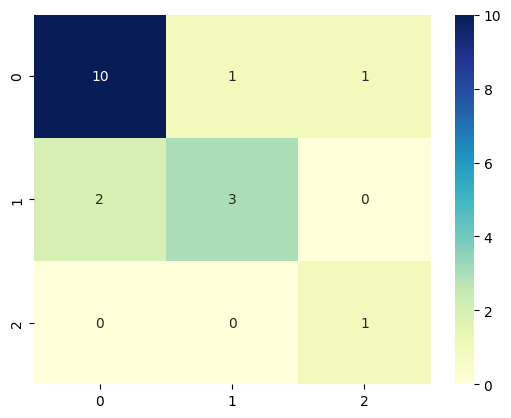

In [21]:
sns.heatmap(conf_matrix, cmap = "YlGnBu", annot = True)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

    fit_to_consume       0.83      0.83      0.83        12
moderately_healthy       0.75      0.60      0.67         5
       not_healthy       0.50      1.00      0.67         1

          accuracy                           0.78        18
         macro avg       0.69      0.81      0.72        18
      weighted avg       0.79      0.78      0.78        18



In [23]:
df4 = df3.copy()

df4["Category"] = encode.fit_transform(df4["Category"])
df4

,Package_Food_category,Product Name,Serving Size(gm / ml),Calories per 100g(Kcal),Total Fats(gm),Cholestrol (mg),Sodium(mg),Total Carbohydrates(gm),Sugar (gm),Proteins(gm),Category
0,1,Hide seek,12.5,518.0,25.8,3.9,192.0,67.0,31.5,4.4,0
1,1,Nice,13.0,463.0,15.0,0.0,274.0,76.0,30.5,6.0,0
2,1,Good day,7.5,503.0,22.5,1.2,221.0,68.2,20.4,7.0,1
3,1,Marie Gold,15.0,451.0,12.4,0.0,315.0,77.2,20.0,7.7,1
4,1,Parle G,15.0,454.0,13.0,0.0,296.0,77.3,25.5,6.9,1
...,...,...,...,...,...,...,...,...,...,...,...
81,5,Coca-Cola,355.0,140.0,0.0,0.0,45.0,39.0,39.0,0.0,0
82,5,Pepsi,355.0,150.0,0.0,0.0,40.0,41.0,38.0,0.0,0
83,5,Sprite,355.0,140.0,0.0,0.0,30.0,38.0,38.0,0.0,0
84,5,Mountain Dew,355.0,170.0,0.0,0.0,60.0,46.0,45.0,0.0,2


In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = df4.drop(['Product Name', 'Category'], axis=1)
y = df4['Category']

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = xgb.XGBClassifier()

model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

acc = accuracy_score(y_test2, predictions2)

print("Accuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test2, predictions2))


Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.80      0.80         5
           2       0.33      1.00      0.50         1

    accuracy                           0.78        18
   macro avg       0.68      0.85      0.71        18
weighted avg       0.84      0.78      0.80        18



In [25]:
predicted_series = pd.Series(predictions2, name='Predicted')
actual_series = pd.Series(y_test2.values, name='Actual')

comparison_df = pd.concat([predicted_series, actual_series], axis=1)

print(comparison_df)

    Predicted  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       1
5           0       0
6           2       0
7           2       2
8           1       1
9           2       0
10          1       1
11          1       1
12          0       0
13          0       0
14          1       0
15          0       0
16          1       1
17          0       0


In [26]:
accuracy = accuracy_score(y_test2, predictions2)

precision = precision_score(y_test2, predictions2, average='weighted')

recall = recall_score(y_test2, predictions2, average='weighted')

f1 = f1_score(y_test2, predictions2, average='weighted')

conf_matrix2 = confusion_matrix(y_test2, predictions2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix2)

Accuracy: 0.7777777777777778
Precision: 0.8407407407407408
Recall: 0.7777777777777778
F1-score: 0.7954545454545455
Confusion Matrix:
[[9 1 2]
 [1 4 0]
 [0 0 1]]


<Axes: >

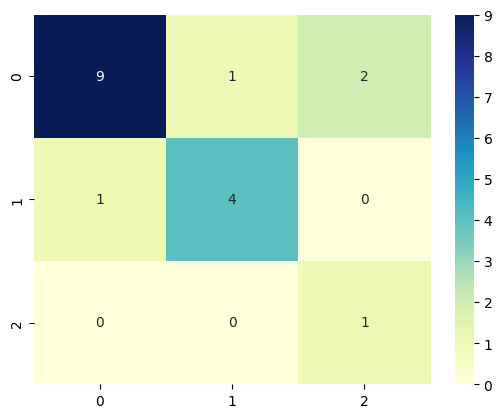

In [27]:
sns.heatmap(conf_matrix2, cmap = "YlGnBu", annot = True)

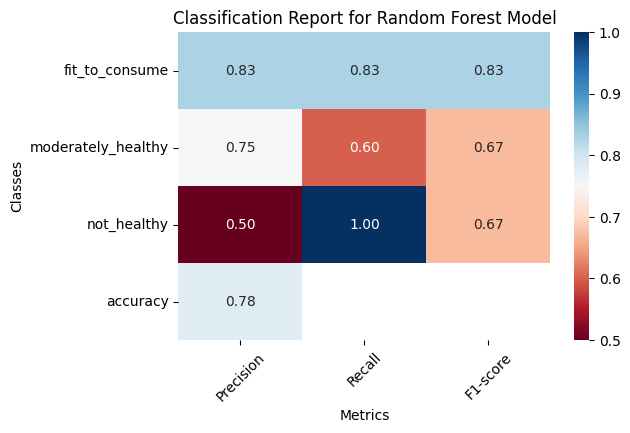

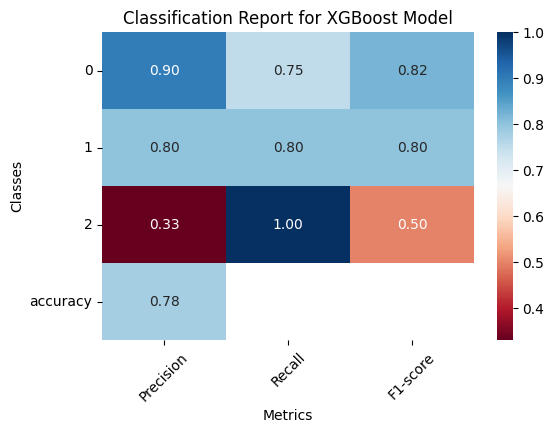

In [28]:
def plot_classification_report(cr, title='Classification report', cmap='RdBu'):
    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) > 0:
            classes.append(t[0])
            v = [float(x) for x in t[1:len(t)-1]]
            plotMat.append(v)

    # Find the length of the longest row
    max_len = max(len(row) for row in plotMat)

    # Pad shorter rows with NaN values to make them the same length
    for row in plotMat:
        while len(row) < max_len:
            row.append(np.nan)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(plotMat, annot=True, cmap=cmap, fmt='.2f', ax=ax)

    ax.set_xticklabels(['Precision', 'Recall', 'F1-score'], rotation=45)
    ax.set_yticklabels(classes, rotation=0)

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Classes')
    ax.set_title(title)
    plt.show()

# Generate classification report for Model 1
cr_model1 = classification_report(y_test, y_pred)

# Generate classification report for Model 2
cr_model2 = classification_report(y_test2, predictions2)

# Plot classification report for Model 1
plot_classification_report(cr_model1, title='Classification Report for Random Forest Model')

# Plot classification report for Model 2
plot_classification_report(cr_model2, title='Classification Report for XGBoost Model')


In [33]:
X_test

,Package_Food_category,Serving Size(gm / ml),Calories per 100g(Kcal),Total Fats(gm),Cholestrol (mg),Sodium(mg),Total Carbohydrates(gm),Sugar (gm),Proteins(gm)
75,4,30.0,450.0,20.0,0.0,250.0,60.0,3.0,7.0
0,1,12.5,518.0,25.8,3.9,192.0,67.0,31.5,4.4
70,0,200.0,50.0,1.0,2.0,40.0,7.0,6.0,4.0
22,0,100.0,69.0,3.8,0.0,15.1,5.1,4.7,3.6
12,2,10.0,522.0,33.1,0.0,38.0,51.4,43.0,6.4
56,1,10.0,380.0,18.0,5.0,210.0,50.0,15.0,5.0
10,2,38.0,444.0,15.9,4.9,170.0,72.9,55.5,3.3
18,0,12.0,405.0,17.0,65.0,263.0,58.0,26.5,5.0
4,1,15.0,454.0,13.0,0.0,296.0,77.3,25.5,6.9
67,0,10.0,720.0,81.0,30.0,10.0,0.0,0.0,0.0


In [34]:
test_data = np.array([
    [1, 12.5, 518.0, 25.8, 3.9, 192.0, 67.0, 31.5, 4.4], 
    [1, 13.0, 463.0, 15.0, 0.0, 274.0, 76.0, 30.5, 6.0], 
    [1, 7.5, 503.0, 22.5, 1.2, 221.0, 68.2, 20.4, 7.0],  
    [1, 15.0, 451.0, 12.4, 0.0, 315.0, 77.2, 20.0, 7.7], 
    [1, 15.0, 454.0, 13.0, 0.0, 296.0, 77.3, 25.5, 6.9], 
])

predictions_test = model2.predict(test_data)
print(predictions2)

[0 0 0 0 0 0 2 2 1 2 1 1 0 0 1 0 1 0]
